# Calibration of non-linear (logarithmic) function

In [1]:
from pylab import *
%pylab inline
from io import StringIO

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/user/.edm/envs/mdd/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
# create two signals: concentration and temperature
c = StringIO("""
1.095406121 3.887032952 6.956500526 9.486921797 \
13.96944459 14.86018043 23.19810833 24.53008787 \
24.72311112 37.44113657 38.05523491 54.1881169""")


T = StringIO("""91.72763561 70.60278306 \
53.0039356 45.03419592 32.45847839 29.03763728 13.49252686 \
12.0641877 18.91647307 12.01351046 11.49379565 9.671537342 """)

c = loadtxt(c)
T = loadtxt(T)

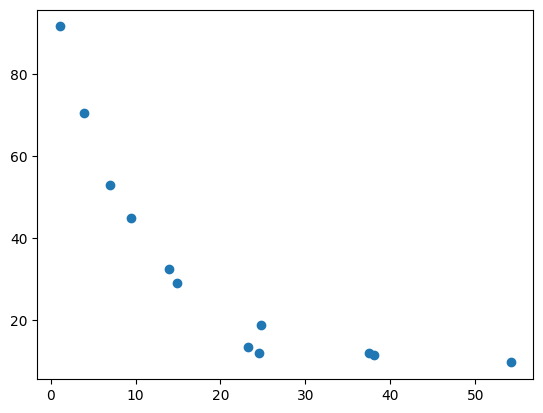

In [3]:
plot(c,T,'o')

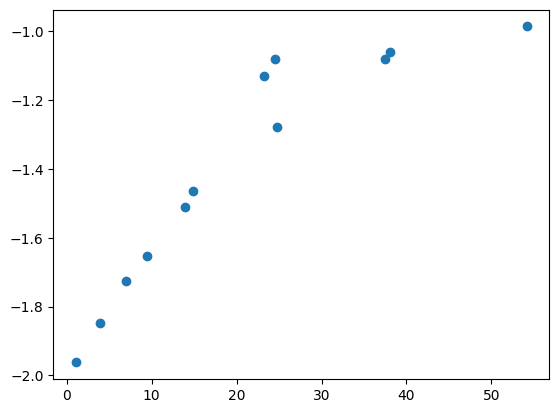

In [4]:
a = -np.log10(T)
plot(c,a,'o')

### see the linear part and the "saturated part", use only the linear one

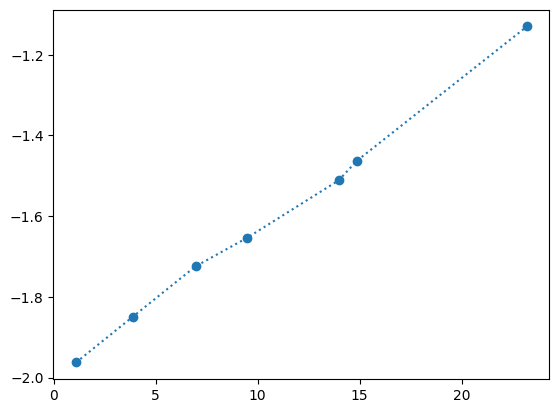

In [5]:
ind = c < 24
plot(c[ind],a[ind],':o')

In [6]:
polyfit(c[ind],a[ind],1)

array([ 0.03674248, -1.99891754])

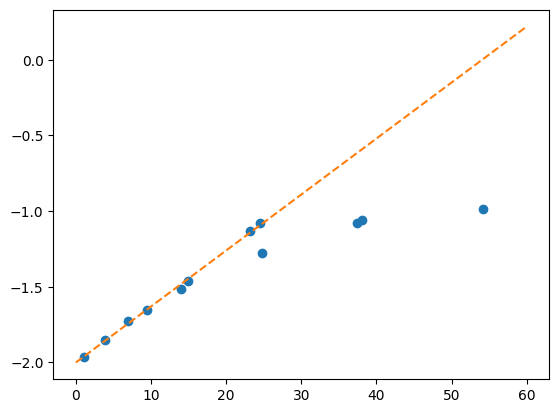

In [7]:
plot(c,a,'o')
c1 = linspace(0,60,100)
a1 = 0.037*c1-2.0
plot(c1,a1,'--')

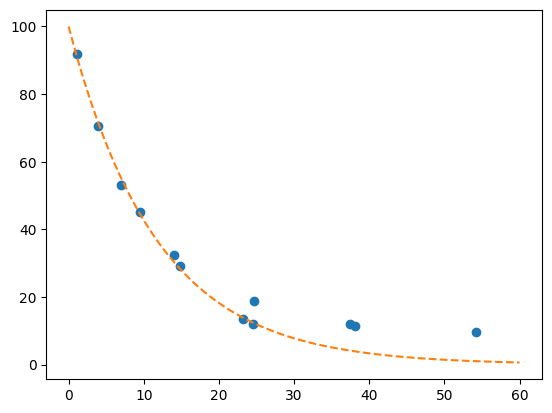

In [8]:
plot(c,T,'o')
a1 = 0.037*c1-2.0
plot(c1,10**(-a1),'--')

In [9]:
print(f'c = {c}')
print(f'T = {T}')

c = [ 1.09540612  3.88703295  6.95650053  9.4869218  13.96944459 14.86018043
 23.19810833 24.53008787 24.72311112 37.44113657 38.05523491 54.1881169 ]
T = [91.72763561 70.60278306 53.0039356  45.03419592 32.45847839 29.03763728
 13.49252686 12.0641877  18.91647307 12.01351046 11.49379565  9.67153734]


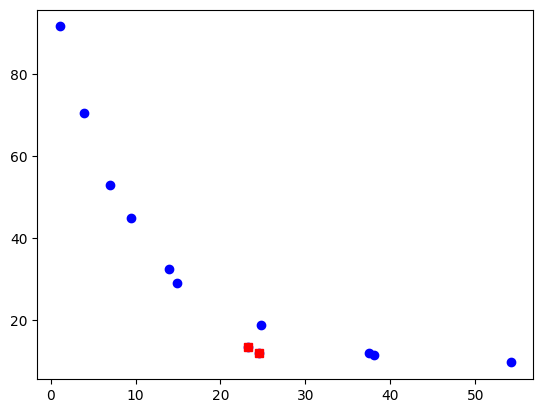

In [10]:
plot(c,T,'bo',c[6:8],T[6:8],'rs')

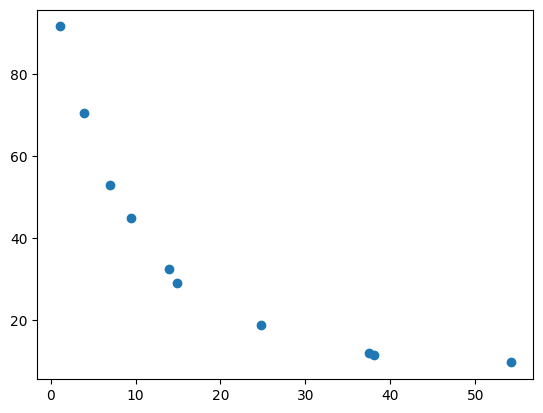

In [11]:
c2 = c.copy()
T2 = T.copy()
mask = ones(c2.shape[0],dtype=bool)
mask[[6,7]] = False
plot(c2[mask],T2[mask],'o')

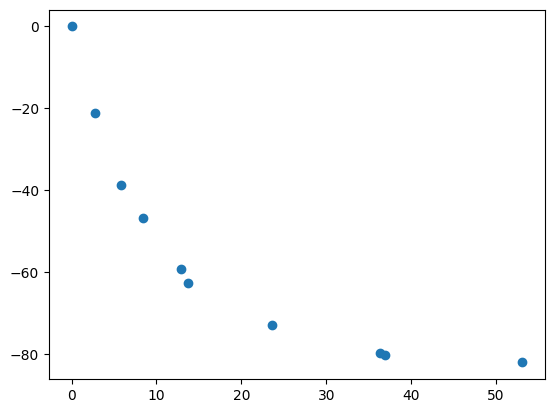

In [12]:
plot(c2[mask]-c2[0],T2[mask]-T2[0],'o')

In [13]:
c3 = c2[mask] - c2[0]
T3 = T2[0] - T2[mask]

In [14]:
c3

array([ 0.        ,  2.79162683,  5.86109441,  8.39151568, 12.87403847,
       13.76477431, 23.627705  , 36.34573045, 36.95982879, 53.09271078])

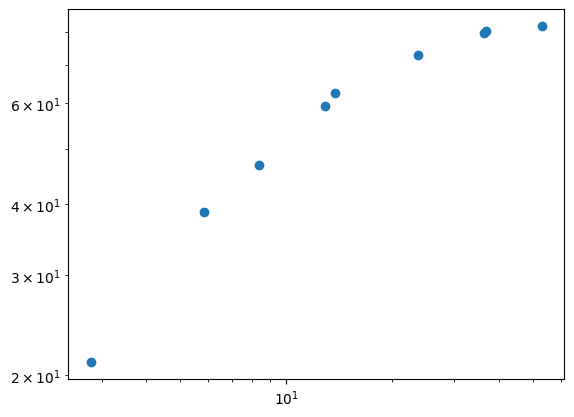

In [15]:
loglog(c3,T3,'o')